In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import image
import seaborn as sns
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import functools as f
from sklearn.model_selection import train_test_split
import splitfolders

from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

#from keras.layers.advanced_activations import LeakyReLU
import visualkeras

%matplotlib.inline

In [ ]:
splitfolders.ratio('../Alzheimer_classification/Dataset', output="output", seed=1345, ratio=(.8, 0.1,0.1))

Copying files: 6400 files [00:16, 382.55 files/s]


In [ ]:
mild_dem = ('mild_dem '*896).split()
mod_dem = ('mod_dem '*64).split()
non_dem = ('non_dem '*3200).split()
very_mild_dem = ('very_mild_dem '*2240).split()

In [ ]:
labels = [mild_dem, mod_dem, non_dem, very_mild_dem]
labels = f.reduce(lambda x, y: x+y, labels)
labels = pd.Series(labels)
labels = pd.DataFrame(labels, columns = ['label'])

In [ ]:
labels.to_csv('labels.csv')

In [ ]:
y = labels
y_test, y_train = train_test_split(y, train_size=0.25, stratify=y)

In [ ]:
y_train.label.value_counts()

non_dem          2400
very_mild_dem    1680
mild_dem          672
mod_dem            48
Name: label, dtype: int64

In [ ]:
#data_dir ='ouput/'  
img_height = 128
img_width = 128

train = tf.keras.utils.image_dataset_from_directory(
    'output/train',
    #labels="inferred",
    #label_mode="int",
    #class_names=['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented'],
    #color_mode="grayscale",
    batch_size=64,
    image_size=(img_height, img_width),
    seed=123,
    #interpolation="bilinear"
)

test = tf.keras.utils.image_dataset_from_directory(
    'output/test',
    #labels="inferred",
    #label_mode="int",
    #class_names=['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented'],
    #color_mode="grayscale",
    batch_size=64,
    image_size=(img_height, img_width),
    seed=123,
    #interpolation="bilinear"
)

val = tf.keras.utils.image_dataset_from_directory(
    'output/val',
    #labels="inferred",
    #label_mode="int",
    #class_names=['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented'],
    #color_mode="grayscale",
    batch_size=64,
    image_size=(img_height, img_width),
    seed=123,
    #interpolation="bilinear"
)

Found 5119 files belonging to 4 classes.
Found 961 files belonging to 4 classes.
Found 958 files belonging to 4 classes.


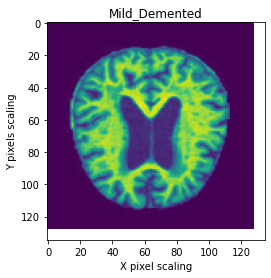

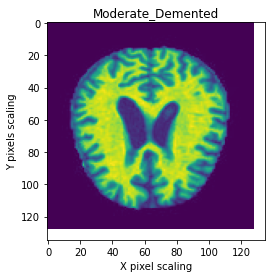

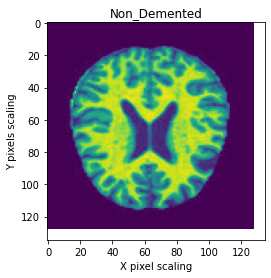

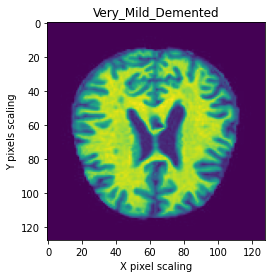

In [ ]:
#Visualize images
dem_types = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
examples = ['Mild_Demented/mild_2.jpg', 'Moderate_Demented/moderate_2.jpg', 'Non_Demented/non_2.jpg', 'Very_Mild_Demented/verymild_2.jpg']
for i in range(len(dem_types)): 
    plt.plot(128,128)
    plt.figure(i+1) 
    plt.title(dem_types[i])
    plt.xlabel("X pixel scaling")
    plt.ylabel("Y pixels scaling")
    plt.imshow(image.imread('Dataset/'+ examples[i]))
plt.show()

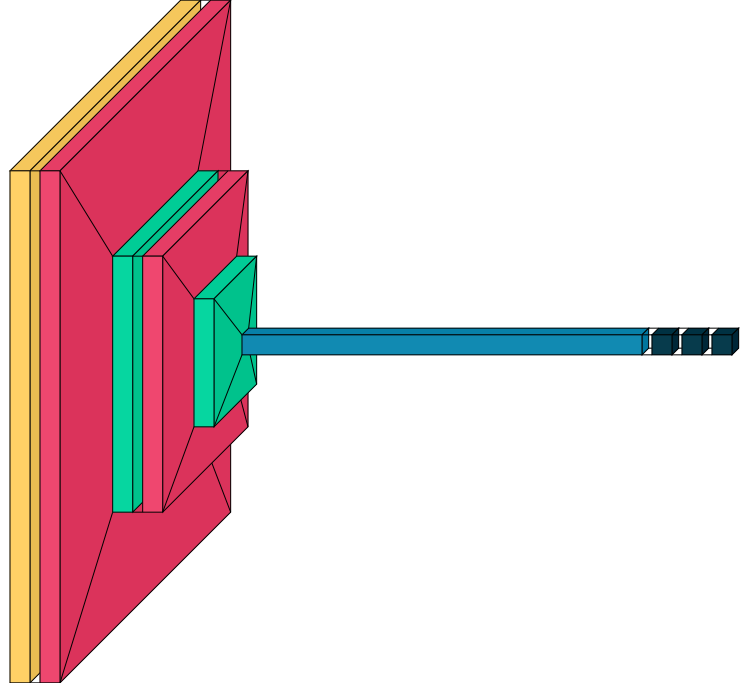

In [ ]:
#LeNet-5 CNN Architecture

model = keras.Sequential()
model.add(Rescaling(1./255, input_shape=(128, 128, 3)))
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation = 'relu', input_shape = (128, 128, 3), kernel_initializer="he_normal"))
model.add(layers.AveragePooling2D())
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation = 'relu', input_shape = (128, 128, 3), kernel_initializer="he_normal"))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(units = 128, activation = 'relu', kernel_initializer="he_normal"))
model.add(layers.Dense(units = 64, activation = 'relu'))
model.add(layers.Dense(units = 4, activation = 'softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
visualkeras.layered_view(model)

In [ ]:
hist = model.fit(train, epochs = 100, validation_data = val)

Epoch 1/100
80/80 [==============================] - 45s 531ms/step - loss: 1.0715 - accuracy: 0.5255 - val_loss: 0.8035 - val_accuracy: 0.6420
Epoch 2/100
80/80 [==============================] - 37s 456ms/step - loss: 0.7375 - accuracy: 0.6824 - val_loss: 0.5793 - val_accuracy: 0.7557
Epoch 3/100
80/80 [==============================] - 40s 497ms/step - loss: 0.4835 - accuracy: 0.8160 - val_loss: 0.4718 - val_accuracy: 0.8027
Epoch 4/100
80/80 [==============================] - 38s 478ms/step - loss: 0.3523 - accuracy: 0.8615 - val_loss: 0.2767 - val_accuracy: 0.8967
Epoch 5/100
80/80 [==============================] - 39s 483ms/step - loss: 0.1662 - accuracy: 0.9490 - val_loss: 0.1374 - val_accuracy: 0.9572
Epoch 6/100
80/80 [==============================] - 38s 477ms/step - loss: 0.0951 - accuracy: 0.9711 - val_loss: 0.0955 - val_accuracy: 0.9697
Epoch 7/100
80/80 [==============================] - 40s 492ms/step - loss: 0.0399 - accuracy: 0.9920 - val_loss: 0.0947 - val_accuracy:

Accuracy - LeNet5 Architecture


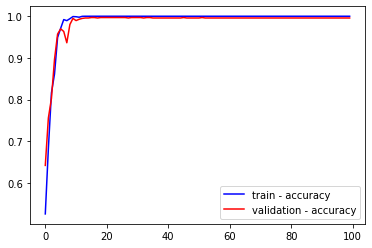




Loss - LeNet5 Architecture


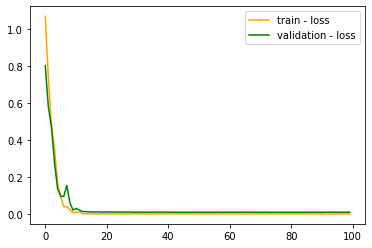

In [ ]:
print("Accuracy - LeNet5 Architecture")
plt.plot(hist.history['accuracy'],c='b',label='train - accuracy')
plt.plot(hist.history['val_accuracy'],c='r',label='validation - accuracy')
plt.legend(loc='lower right')
plt.show()

print("\n\n")
print('Loss - LeNet5 Architecture')
plt.plot(hist.history['loss'],c='orange',label='train - loss')
plt.plot(hist.history['val_loss'],c='g',label='validation - loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
model.evaluate(test)

16/16 [==============================] - 3s 155ms/step - loss: 0.0368 - accuracy: 0.9906


[0.03678678348660469, 0.9906347393989563]

In [ ]:
model.save('LeNet-5.h5')

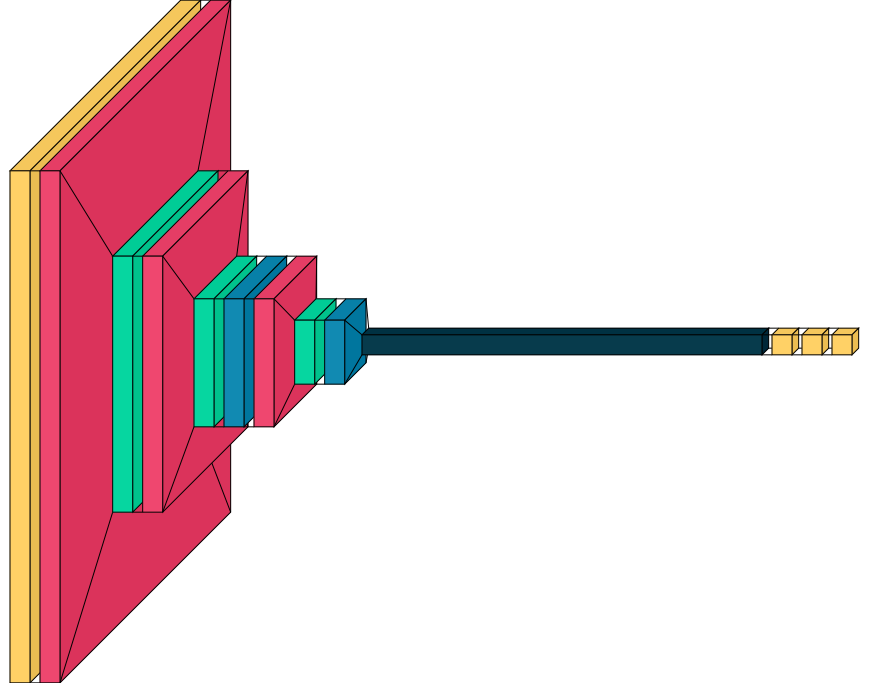

In [ ]:
#0.5 accuracy with a LeNet-5 architecture. Better than random guess, but can get something better
#Let's try same architecture but MaxPooling instead of AveragePooling

#LeNet-5 CNN Architecture (with MaxPooling)
model2 = keras.Sequential()
model2.add(Rescaling(1./255, input_shape=(128, 128, 3)))
model2.add(Conv2D(filters=6, kernel_size=(3, 3), padding='same', activation = 'relu', kernel_initializer="he_normal"))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation = 'relu', kernel_initializer="he_normal"))
model2.add(MaxPooling2D(pool_size=(2,2)))


model2.add(Dropout(0.20))

model2.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(units = 128, activation = 'relu', kernel_initializer="he_normal"))
model2.add(Dense(units = 64, activation = 'relu'))
model2.add(Dense(units = 4, activation = 'softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
visualkeras.layered_view(model2)

In [ ]:
hist2 = model2.fit(train, epochs = 100, validation_data = val)

Epoch 1/100
80/80 [==============================] - 34s 412ms/step - loss: 1.0712 - accuracy: 0.5040 - val_loss: 0.9733 - val_accuracy: 0.6347
Epoch 2/100
80/80 [==============================] - 33s 411ms/step - loss: 0.8719 - accuracy: 0.5982 - val_loss: 0.7470 - val_accuracy: 0.6816
Epoch 3/100
80/80 [==============================] - 33s 408ms/step - loss: 0.7070 - accuracy: 0.6900 - val_loss: 0.6067 - val_accuracy: 0.7505
Epoch 4/100
80/80 [==============================] - 33s 410ms/step - loss: 0.5786 - accuracy: 0.7591 - val_loss: 0.5443 - val_accuracy: 0.7505
Epoch 5/100
80/80 [==============================] - 32s 403ms/step - loss: 0.4746 - accuracy: 0.8011 - val_loss: 0.3335 - val_accuracy: 0.9008
Epoch 6/100
80/80 [==============================] - 37s 457ms/step - loss: 0.3833 - accuracy: 0.8517 - val_loss: 0.2785 - val_accuracy: 0.9311
Epoch 7/100
80/80 [==============================] - 34s 419ms/step - loss: 0.3496 - accuracy: 0.8615 - val_loss: 0.2202 - val_accuracy:

Accuracy - LeNet-5 with MaxPooling


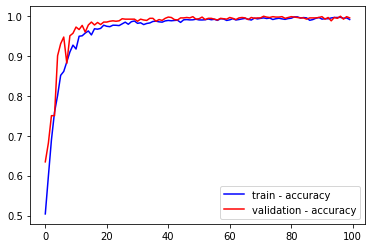




Loss - LeNet-5 with MaxPooling


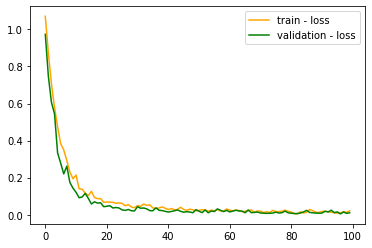

In [ ]:
print("Accuracy - LeNet-5 with MaxPooling")
plt.plot(hist2.history['accuracy'],c='b',label='train - accuracy')
plt.plot(hist2.history['val_accuracy'],c='r',label='validation - accuracy')
plt.legend(loc='lower right')
plt.show()

print("\n\n")
print('Loss - LeNet-5 with MaxPooling')
plt.plot(hist2.history['loss'],c='orange',label='train - loss')
plt.plot(hist2.history['val_loss'],c='g',label='validation - loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
model2.evaluate(test)

16/16 [==============================] - 3s 126ms/step - loss: 0.0288 - accuracy: 0.9927


[0.028761612251400948, 0.9927158951759338]

In [ ]:
model2.save('LeNet-5Max.h5')

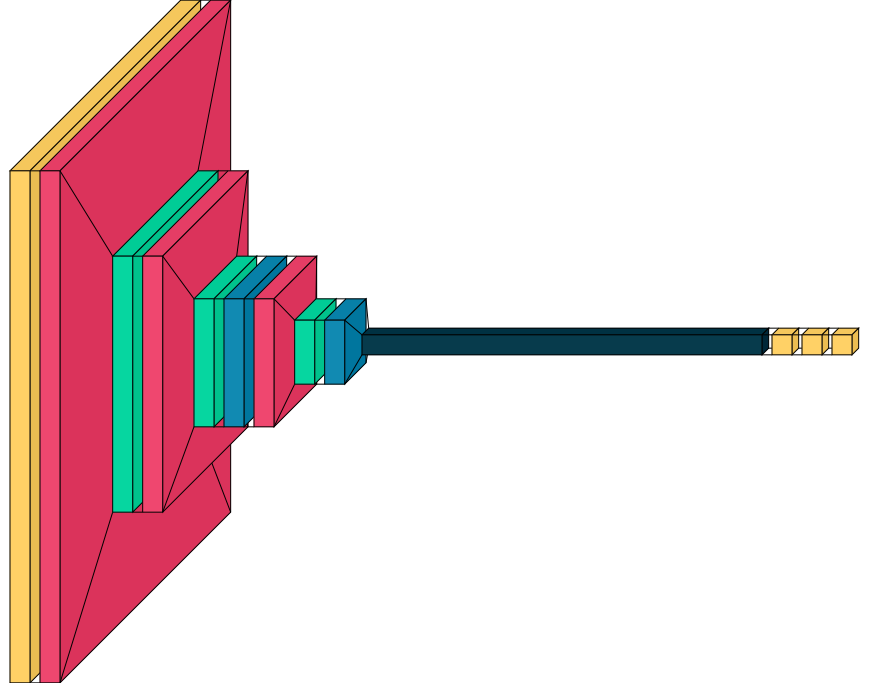

In [ ]:
#New Architecture
model3 = Sequential()
model3.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model3.add(Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Dropout(0.20))

model3.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128,activation="relu",kernel_initializer="he_normal"))
model3.add(Dense(64,"relu"))
model3.add(Dense(4,"softmax"))

model3.compile(loss="sparse_categorical_crossentropy", optimizer = "Adam",metrics=["accuracy"])
visualkeras.layered_view(model3)

In [ ]:
model3.fit(train, epochs = 100, validation_data = val)

Epoch 1/100
80/80 [==============================] - 50s 607ms/step - loss: 1.3624 - accuracy: 0.4849 - val_loss: 1.0062 - val_accuracy: 0.5355
Epoch 2/100
80/80 [==============================] - 49s 606ms/step - loss: 0.9629 - accuracy: 0.5372 - val_loss: 0.9186 - val_accuracy: 0.5271
Epoch 3/100
80/80 [==============================] - 49s 606ms/step - loss: 0.8730 - accuracy: 0.5878 - val_loss: 0.8364 - val_accuracy: 0.6284
Epoch 4/100
80/80 [==============================] - 48s 598ms/step - loss: 0.8074 - accuracy: 0.6343 - val_loss: 0.7905 - val_accuracy: 0.6649
Epoch 5/100
80/80 [==============================] - 49s 608ms/step - loss: 0.7302 - accuracy: 0.6710 - val_loss: 0.6671 - val_accuracy: 0.7140
Epoch 6/100
80/80 [==============================] - 49s 607ms/step - loss: 0.6495 - accuracy: 0.7152 - val_loss: 0.5570 - val_accuracy: 0.7620
Epoch 7/100
80/80 [==============================] - 48s 599ms/step - loss: 0.5296 - accuracy: 0.7746 - val_loss: 0.4373 - val_accuracy:

In [ ]:
hist3 = model3.fit(train, epochs = 100, validation_data = val)

In [ ]:
print("Accuracy - LeNet-5 with MaxPooling")
plt.plot(hist3.history['accuracy'],c='b',label='train - accuracy')
plt.plot(hist3.history['val_accuracy'],c='r',label='validation - accuracy')
plt.legend(loc='lower right')
plt.show()

print("\n\n")
print('Loss - LeNet-5 with MaxPooling')
plt.plot(hist3.history['loss'],c='orange',label='train - loss')
plt.plot(hist3.history['val_loss'],c='g',label='validation - loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
model3.evaluate(test)

In [ ]:
model3.save('CNN_Model.h5')